<a href="https://colab.research.google.com/github/dbetanc1/MAT494/blob/main/HW_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Algebra**

# **1.4 Principal Component Analysis**

Principal component analysis is commonly used for dimensionality reduction
by projecting each data point onto only the first few principal components to
obtain lower-dimensional data while preserving as much of the data’s varia-
tion as possible. Its underlying mathematics can be explained with singular
value decomposition.

1.4.1 Singular Value Decomposition

Let A be an m × n matrix.Then AT A is symmetric and can be orthogonally
diagonalized. Let v1,...,vn be an orthonormal basis for Rn consisting of eigen-
vectors of AT A, and let λ1,...,λn be the associated eigenvalues of AT A. Then,
for 1 ≤ i ≤ n,

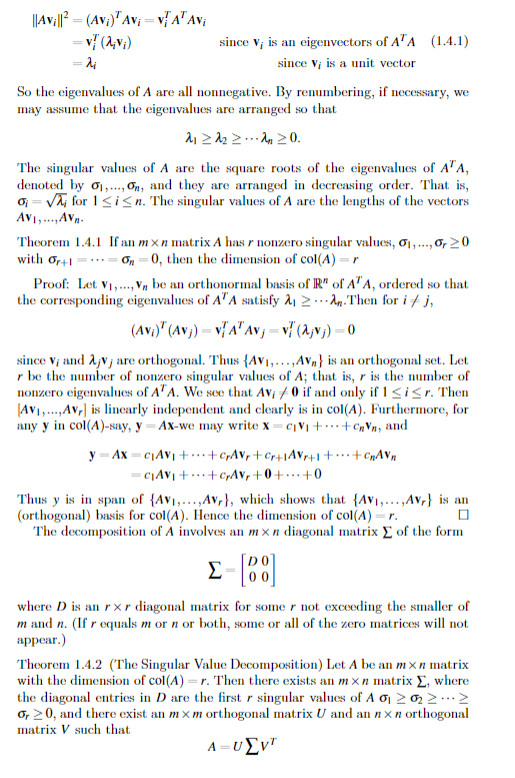

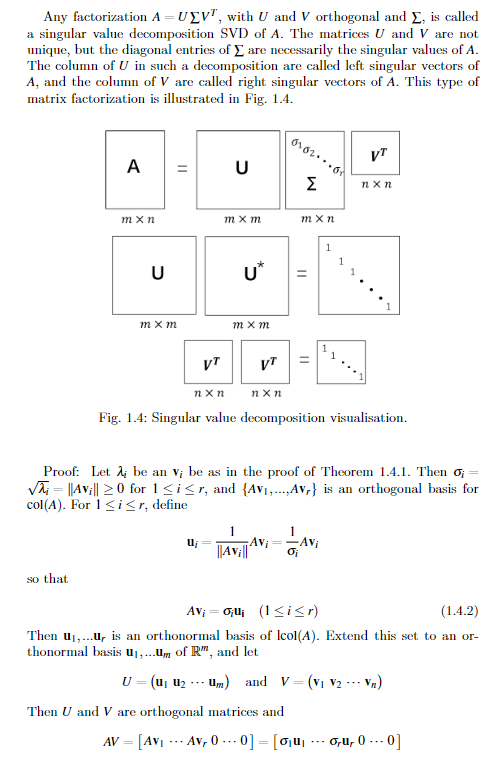

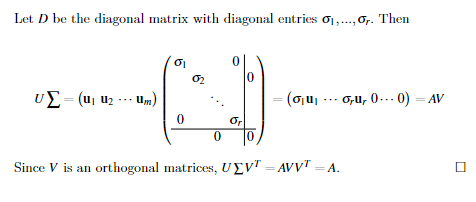

ValueError: ignored

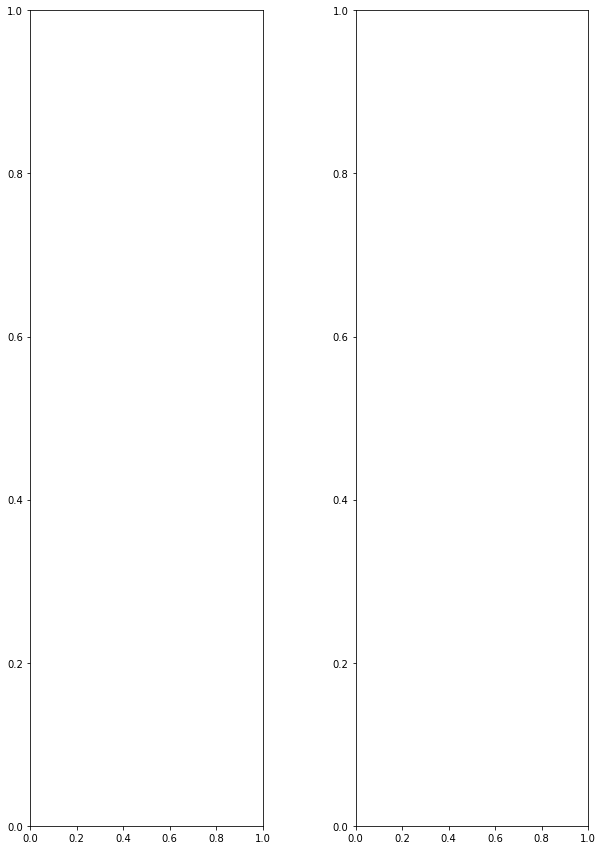

In [15]:
# Listing 1

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

x=np.array([1,0]) # Original vector
theta = 30 * mt.pi / 180 # 30 degress in radian
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) # Rotation matrix for theta=30 degrees
B = np.array([[3,0],[0,1]]) # Stretching matrix

Ax = A @ x  # y1 is the rotated vector
Bx = B @ x  # y2 is the stretched vector

# Reshaping and storing both x and Ax in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])
# Reshaping and storing both x and Bx in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), Bx.reshape(1,2)])
origin = [0], [0] # origin point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(*origin, t1[:,0], t1[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,1.5])
ax1.set_ylim([-0.5,1])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Rotation transform")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(*origin, t2[:,0], t2[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,3.5])
ax2.set_ylim([-1.5,1.5])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Stretching transform")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

plt.show()

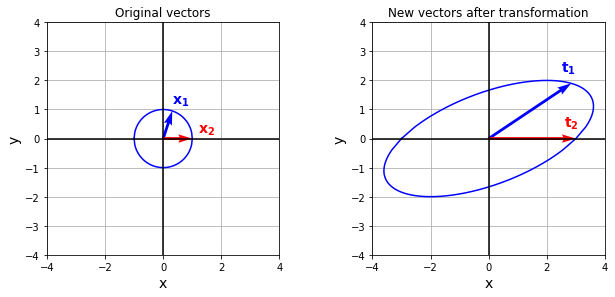

In [14]:
# Listing 2

# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

# getting a sample vector from x
x_sample1 = x[:, 65]
x_sample2 = x[:, 100]

A = np.array([[3, 2],
              [0, 2]]) 

t = A @ x  # Vectors in t are the transformed vectors of x

t_sample1 = t[:, 65]
t_sample2 = t[:, 100]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.3, 1.2, "$\mathbf{x_1}$", color='b', fontsize=14)
ax1.text(1.2, 0.2, "$\mathbf{x_2}$", color='r', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.5, 2.3, "$\mathbf{t_1}$", color='b', fontsize=14)
ax2.text(2.6, 0.4, "$\mathbf{t_2}$", color='r', fontsize=14)
plt.savefig('2.png', dpi=300, bbox_inches='tight')

plt.show()

In [16]:
# Listing 3
B = np.array([[-1, 1],[0, -2]])
lam, u = LA.eig(B)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [-1. -2.]
u= [[ 1.     -0.7071]
 [ 0.      0.7071]]


In [17]:
# Listing 4
A = np.array([[3, 2],
              [0, 2]]) 
lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [3. 2.]
u= [[ 1.     -0.8944]
 [ 0.      0.4472]]


IndexError: ignored

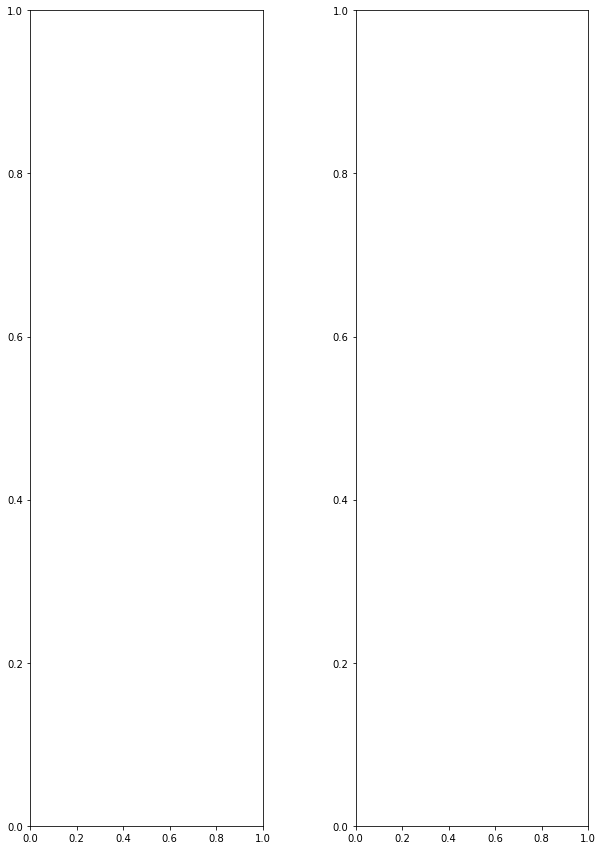

In [18]:
# Listing 5

t = A @ x   # Vectors in t are the transformed vectors of x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.3, 1.3, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2, 2.3, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

In [19]:
# Listing 6

# The Basis
v_1 = np.array([[1],[0]])
v_2 = np.array([[-1/mt.sqrt(2)],[1/mt.sqrt(2)]])

# Change of coordinate matrix
p =np.concatenate([v_1, v_2], axis=1)
p_inv =  np.linalg.inv(p) 

# Coordinate of x in R^2
x=np.array([[2], [2]])

# New coordinate relative to basis B
x_B = p_inv @ x

print("x_B=", np.round(x_B, 2))

x_B= [[4.  ]
 [2.83]]


In [20]:
# Listing 7
A = np.array([[3, 1],
              [1, 2]]) 

lam, u = LA.eig(A)
u1= u[:,0].reshape(2,1)
lam1 = lam[0]
# A_1 = lambda_1 * u1 * u1^T
A_1 = lam1 * (u1 @ u1.T)
u2= u[:,1].reshape(2,1)
lam2 = lam[1]
# A_2 = lambda_2 * u2 * u2^T
A_2 = lam2 * (u2 @ u2.T)
print("A_1=", np.round(A_1, 4))

A_1= [[2.618 1.618]
 [1.618 1.   ]]


In [21]:
# Listing 8
lam_A_1, u_A_1 = LA.eig(A_1)
print("lam=", np.round(lam_A_1, 4))
print("u=", np.round(u_A_1, 4))

lam= [ 3.618 -0.   ]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


ValueError: ignored

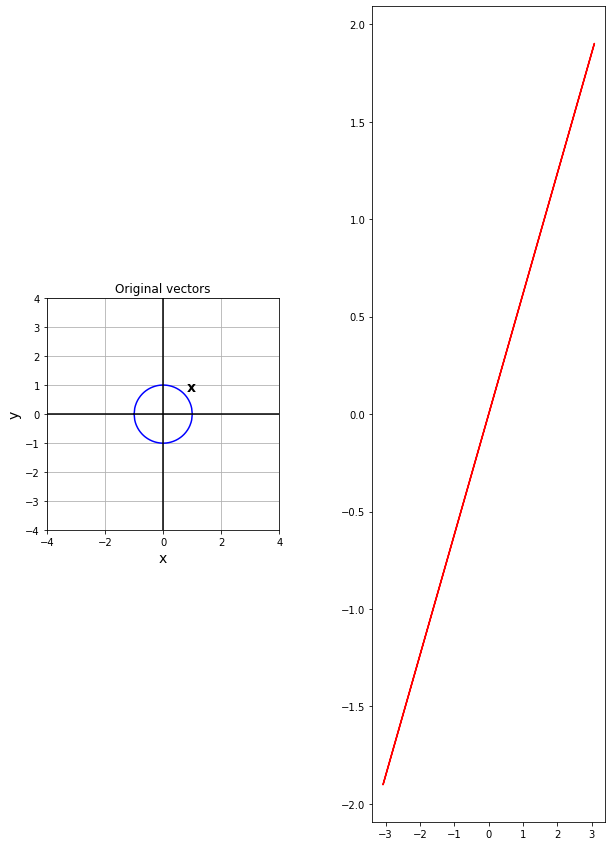

In [22]:
# Listing 9

# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

t = A_1 @ x  # Vectors in t are the transformed vectors of x

# getting the transformed sample of x from t
t_sample = t[:, 100]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting s
ax1.plot(x[0,:], x[1,:], color='b')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.8, 0.8, "$\mathbf{x}$", fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='r')
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.4, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(1.6, 2.3, "$\lambda_1\mathbf{u_1}\mathbf{u_1}^T\mathbf{x}$", fontsize=14)
#plt.savefig('8.png', dpi=300, bbox_inches='tight')

plt.show()

In [23]:
# Listing 10

A = np.array([[4, 1, 3],
              [8, 3, -2]])
lam, v = LA.eig(A.T @ A)
print("lam=", np.round(lam, 4))
print("v=", np.round(v, 4))

lam= [90.1167  0.     12.8833]
v= [[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]


In [24]:
# Listing 11

V = v[:, lam.argsort()[::-1]]

lam_sorted = np.sort(lam)[::-1]
lam_sorted = lam_sorted[lam_sorted > 1e-8]
sigma = np.sqrt(lam_sorted)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(sigma)

print("Sigma=", np.round(Sigma, 4))
print("V=", np.round(V, 4))

Sigma= [[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]
V= [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]


In [26]:
# Listing 12

r = len(sigma)
U = A @ V[:,:r] / sigma
print("U=", np.round(U, 4))

U= [[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]


In [25]:
# Listing 13

U, s, VT = LA.svd(A)
print("U=", np.round(U, 4))
print("s=", np.round(s, 4))
print("V", np.round(VT.T, 4))

U= [[-0.4121 -0.9111]
 [-0.9111  0.4121]]
s= [9.493  3.5893]
V [[-0.9415 -0.0969 -0.3228]
 [-0.3314  0.0906  0.9391]
 [ 0.0617 -0.9912  0.1174]]


In [27]:
# Listing 14

Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
A_reconstructed = U @ Sigma @ VT
print("Reconstructed A=", A_reconstructed)

Reconstructed A= [[-4. -1. -3.]
 [-8. -3.  2.]]


In [28]:
# Listing 15

# Reading the image
mat = plt.imread("Picture.png")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
k = 30
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()

FileNotFoundError: ignored

IndexError: ignored

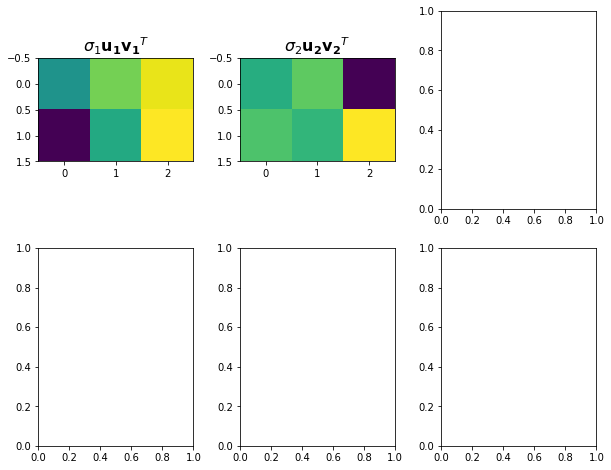

In [31]:
#Listing 16
fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), fontsize=16)
    
plt.show()

In [32]:
# listing 17
# Reading the image
mat = plt.imread("shapes.png")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image")

for i in range(1, 4):
    k = i * 2
    # Reconstruction of the matrix using the first k singular values
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    axes[i // 2, i % 2].imshow(mat_approx, cmap='gray')
    axes[i // 2, i % 2].set_title("Reconstructed image using the \n first {} singular values".format(k))

plt.show()

FileNotFoundError: ignored

1.4.2 Low-Rank Matrix Approximations

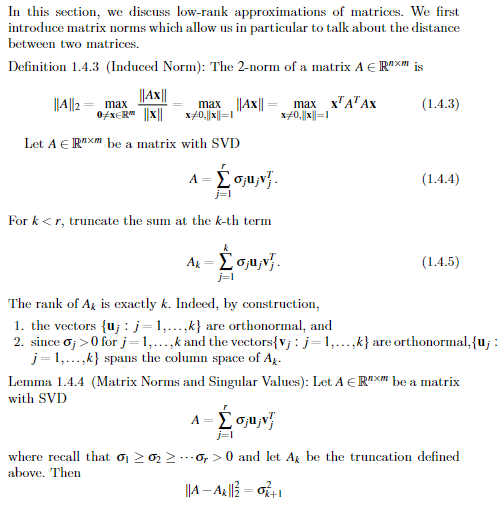

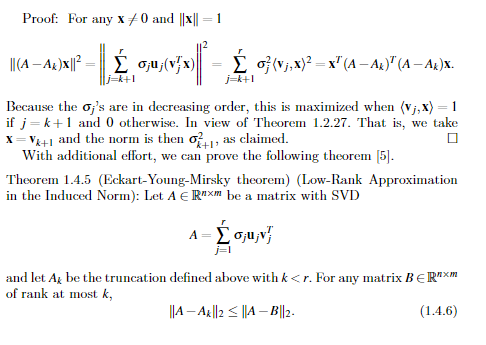

## 1.4.3 Principal Component Analysis

1.4.3.1 Covariance Matrix

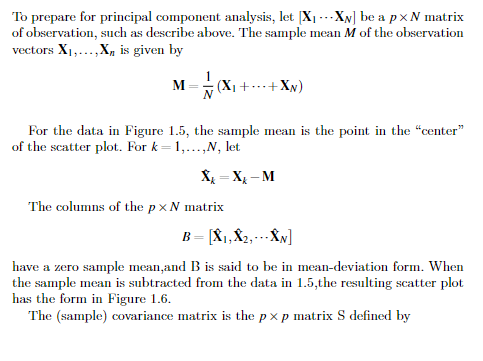

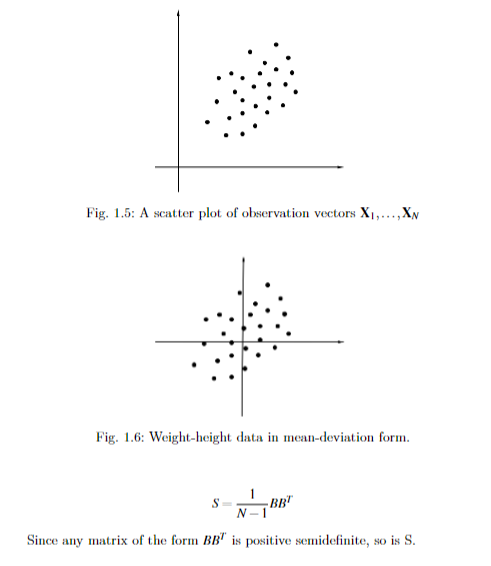

1.4.3.2 Principal Component Analysis

Now assume that the columns of the p × N data matrix
X =[X1,X2,···XN ]
is already in mean-deviation from. The goal of principal component analysis
(PCA) is to find k,(k ≤ p)orthonormal vectors v1,...,vk,(top k principal
components) that maximize the objective function

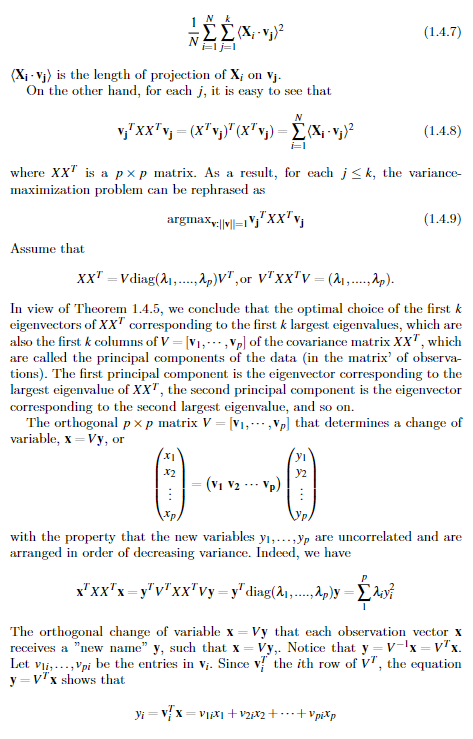


Thus yi is a linear combination of the original variables x1,...,xp, using the
entries the eigenvector vi as weights, which are called loadings.

1.4.3.3 Total Variance

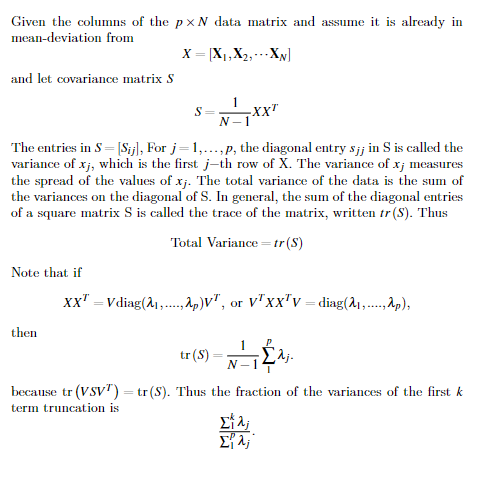

# Principal Component Analysis from Scratch in Python

Suppose we have a dataset having two variables and 10 number of data points. If we were asked to visualize
the data points, we can do it very easily. The result is very interpretable as well.
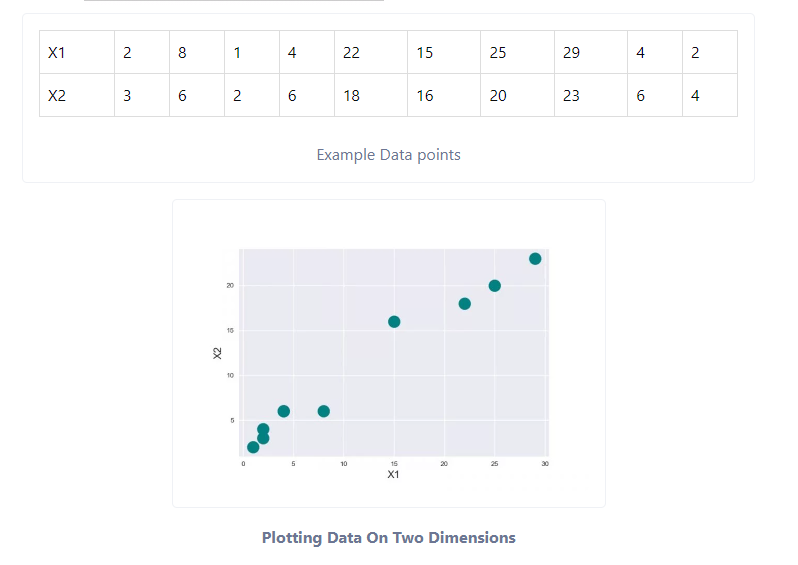

“The curse of dimensionality”.
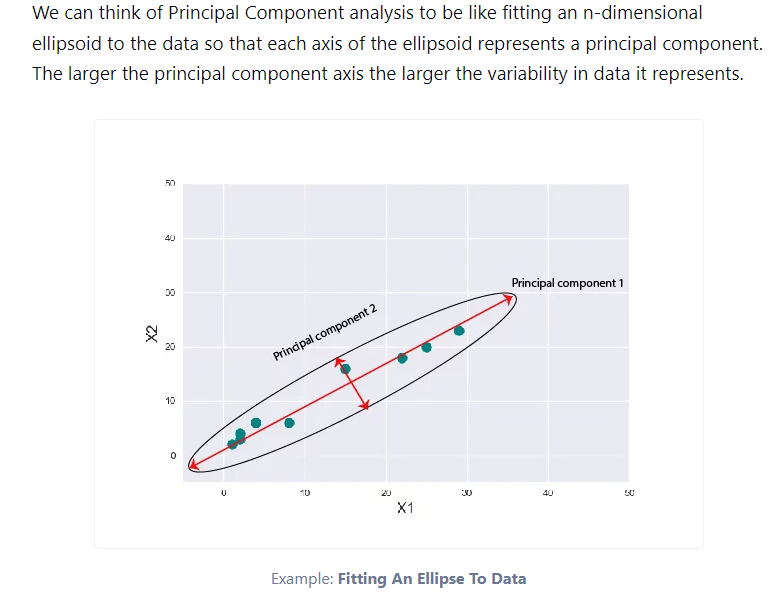

In [6]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose()).transpose()
     
    return X_reduced

In [7]:
import pandas as pd
 
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

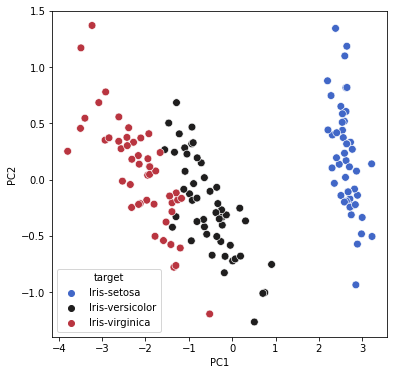

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
